# Counts Scraping

Co-occurence of terms analysis: check how often pre-selected cognitive terms appear in abstracts with ERP terms. 

This analysis searches through pubmed for papers that contain specified ERP and selected association terms.

Data extracted is the count of the number of papers with both terms. This is used to infer the associated terms for each ERP.

In [1]:
%matplotlib inline

import pandas as pd
from scipy.stats import normaltest
from sklearn.metrics.pairwise import cosine_similarity

from erpsc.count import Count
from erpsc.core.io import save_pickle_obj, load_pickle_obj
from erpsc.plts.group import *

## Setup

In [2]:
# Settings
CUR_DATA = 'load'               # 'load', 'file', 'test'
TERM_TYPE = 'cognitive'         # 'cognitive', 'disease'
SAVE_FIG = False

In [3]:
# Initialize object for term count co-occurences
counts = Count()

In [4]:
# Load ERPS and terms from file
if CUR_DATA == 'file':

    counts.set_erps_file()
    counts.set_terms_file('cognitive')

# OR: Set small set of ERPs and terms for tests
elif CUR_DATA == 'test':

    # Small test set of words
    erps = [['P100', 'P1'], 'N400']
    excludes = ['', ['protein', 'gene', 'cell']]
    cog_terms = ['language', 'memory'] 

    # Add ERPs and terms
    counts.set_erps(erps)
    counts.set_exclusions(excludes)
    counts.set_terms(cog_terms)

# Load from pickle file
elif CUR_DATA == 'load':
    
    label = 'Cog' if TERM_TYPE == 'cognitive' else 'Dis'
    counts = load_pickle_obj(label + 'Scrape_counts')

else: 
    raise ValueError('Data setting not understood.')

In [5]:
# If not loading, run the scrape
if CUR_DATA in ['file', 'test']:
    
    # Scrape the co-occurence of terms data
    counts.scrape_data(db='pubmed', verbose=True)
    
    # Save pickle file of results
    #save_pickle_obj(counts, 'test2')

## Scrape Information

In [6]:
# Check database information
counts.db_info

{'menuname': 'PubMed',
 'dbname': 'pubmed',
 'dbbuild': 'Build170322-2207m.1',
 'count': '27035335',
 'description': 'PubMed bibliographic record',
 'lastupdate': '2017/03/23 02:08'}

In [7]:
# Check requester details
counts.req.check()

Requester object is active: 	 False
Number of requests sent: 	 5823
Requester opened: 		 00:08 Thursday 23 March
Requester closed: 		 01:42 Thursday 23 March


# Global Summaries

The total # of ERP papers is 		 45811
Test for normality (log-spaced) 	 t-val: 4.06 	 p-val 0.13


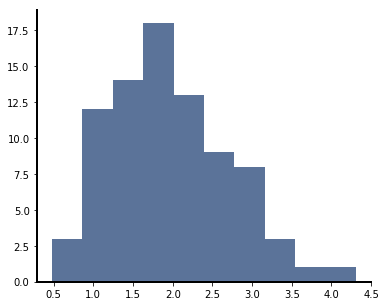

In [8]:
# Check the distribution of ERP papers
print('The total # of ERP papers is \t\t {:.0f}'.format(sum(counts.erp_counts)))
print('Test for normality (log-spaced) \t t-val: {:1.2f} \t p-val {:1.2f}'.format(\
    *normaltest(np.log10(counts.erp_counts))))
plot_count_hist(counts.erp_counts)

The total # of ERP papers is 		 5809030
Test for normality (log-spaced) 	 t-val: 0.39 	 p-val 0.82


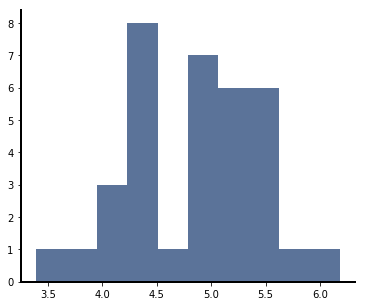

In [9]:
# Check the distribution of term papers
print('The total # of ERP papers is \t\t {:.0f}'.format(sum(counts.term_counts)))
print('Test for normality (log-spaced) \t t-val: {:1.2f} \t p-val {:1.2f}'.format(\
    *normaltest(np.log10(counts.term_counts))))
plot_count_hist(counts.term_counts)

# Check Counts

In [10]:
# Check the most commonly associated COG term for each ERP
counts.check_cooc_erps()

For the  P100  the most common association is 	 vision             with 	 %66.52
For the  P150  the most common association is 	 vision             with 	 %13.40
For the  P180  the most common association is 	 vision             with 	 %12.38
For the  P200  the most common association is 	 auditory           with 	 %36.66
For the  P220  the most common association is 	 number             with 	 %13.89
For the  P240  the most common association is 	 somatosensory      with 	 %28.57
For the  P250  the most common association is 	 vision             with 	 %23.26
For the  P270  the most common association is 	 number             with 	 %10.58
For the  P300  the most common association is 	 auditory           with 	 %32.45
For the  P3a   the most common association is 	 auditory           with 	 %47.23
For the  P3b   the most common association is 	 attention          with 	 %34.23
For the  P340  the most common association is 	 language           with 	 %20.00
For the  P350  the most comm

In [11]:
# Check the most commonly associated ERP for each term
counts.check_cooc_terms()

For  attention            the strongest associated ERP is 	 EDAN    with 	 %100.00
For  arousal              the strongest associated ERP is 	 N550    with 	 %17.39
For  auditory             the strongest associated ERP is 	 ORN     with 	 %91.43
For  awareness            the strongest associated ERP is 	 Pe      with 	 %19.91
For  categorization       the strongest associated ERP is 	 SPpN    with 	 %20.00
For  conflict             the strongest associated ERP is 	 N270    with 	 %49.09
For  decision making      the strongest associated ERP is 	 FRN     with 	 %22.73
For  emotion              the strongest associated ERP is 	 EPN     with 	 %82.53
For  error                the strongest associated ERP is 	 ERN     with 	 %100.00
For  executive functions  the strongest associated ERP is 	 SPpN    with 	 %10.00
For  expectation          the strongest associated ERP is 	 SPeN    with 	 %19.44
For  face                 the strongest associated ERP is 	 VPP     with 	 %84.09
For  grammar  

In [12]:
# Check the terms with the most papers
counts.check_top()

The most studied ERP is  270     with    20464 papers
The most studied term is  number  with  1533845  papers


In [13]:
# Check how many papers were found for each term - ERPs
counts.check_counts('erp')

P100  -     1556
P150  -      291
P180  -      105
P200  -      701
P220  -       72
P240  -       28
P250  -       86
P270  -    20464
P300  -     4992
P3a   -      794
P3b   -      821
P340  -       15
P350  -       68
P400  -      187
P500  -       56
P550  -       17
P600  -      526
N75   -      193
N80   -       96
N90   -       35
N100  -      871
N110  -       24
N120  -       49
N130  -       38
N140  -      155
N150  -      115
N160  -       66
N170  -      982
N180  -       39
N190  -       17
N200  -      607
MMN   -     2895
N2a   -      205
N2b   -      272
N2c   -       48
N240  -       17
N250  -      205
N270  -       55
N280  -       19
N2pc  -      340
N300  -      167
N320  -       28
N350  -       78
N400  -     1938
N450  -      129
N550  -       46
N600  -       10
N700  -       13
LPC   -      494
LPP   -      537
NSW   -       86
PSW   -       94
VPP   -       44
CNV   -      892
PINV  -       32
ELAN  -       30
CPS   -       33
LRP   -      259
LDiN  -       

In [14]:
# Check how many papers were found for each term - COGs
counts.check_counts('term')

attention            -     310668
arousal              -      23327
auditory             -      87197
awareness            -     109408
categorization       -      12135
conflict             -      41395
decision making      -      95642
emotion              -     132852
error                -     151284
executive functions  -       6407
expectation          -      21634
face                 -     236629
grammar              -       2436
language             -     112090
learning             -     217036
memory               -     197776
motor                -     260646
movement             -     191888
number               -    1533845
pain                 -     503793
phonology            -       9262
reading              -      98478
reasoning            -      17350
representation       -      64207
reward               -      27497
semantic             -      26062
sleep                -     129422
spatial              -     234613
speech               -      66994
social        

## Select ERPs with enough articles

In [15]:
# Check how many ERPs currently
counts.n_erps

82

In [16]:
# Drop to only keep ERPs with at least 50 papers
counts.drop_data(50)
counts.n_erps

48

## Group Level Plots

In [17]:
# NOTE: with new scrape, counts has 'get_term_labels' method to do this.
# Create axis labels
counts.terms_labels = [term[-1] for term in counts.terms]

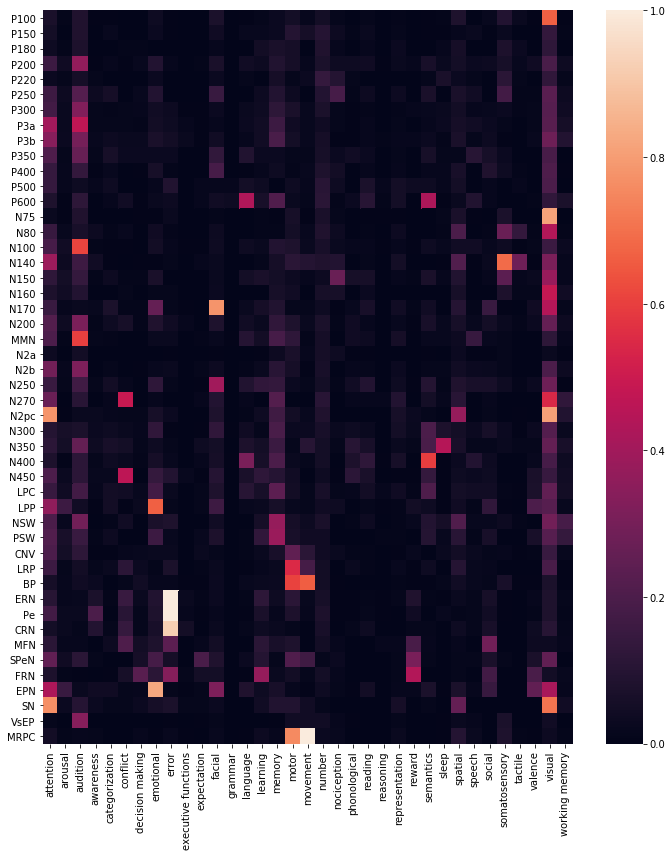

In [18]:
# Plot the matrix of percent associations - ERPs & terms
plot_matrix(counts.dat_percent, counts.terms_labels, counts.labels,
            save_fig=SAVE_FIG)

### Similarity across ERPs & terms

In [19]:
# Calculate similarity between all ERPs (based on term association percents)
sim_erps = cosine_similarity(counts.dat_percent)

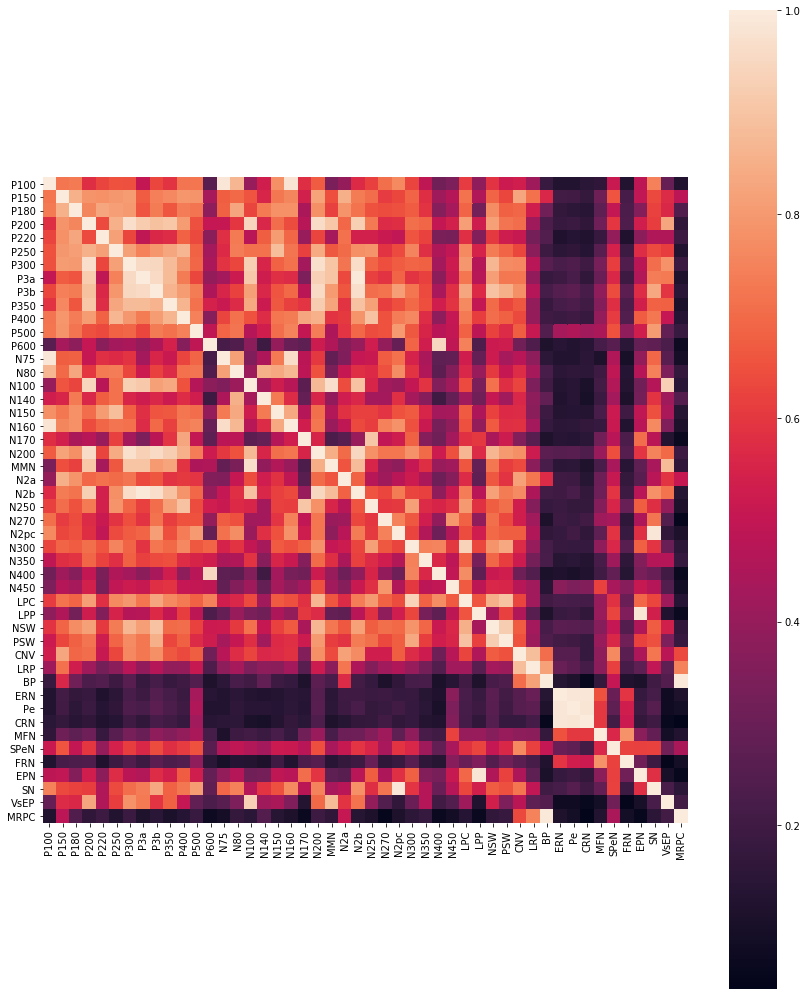

In [20]:
# Plot similarity matrix between ERPs
plot_matrix(sim_erps, counts.labels, counts.labels, square=True,
            figsize=(12, 14), save_fig=SAVE_FIG)

In [21]:
# Calculate similarity between all terms (based on their associated ERPs)
sim_terms = cosine_similarity(counts.dat_percent.T)

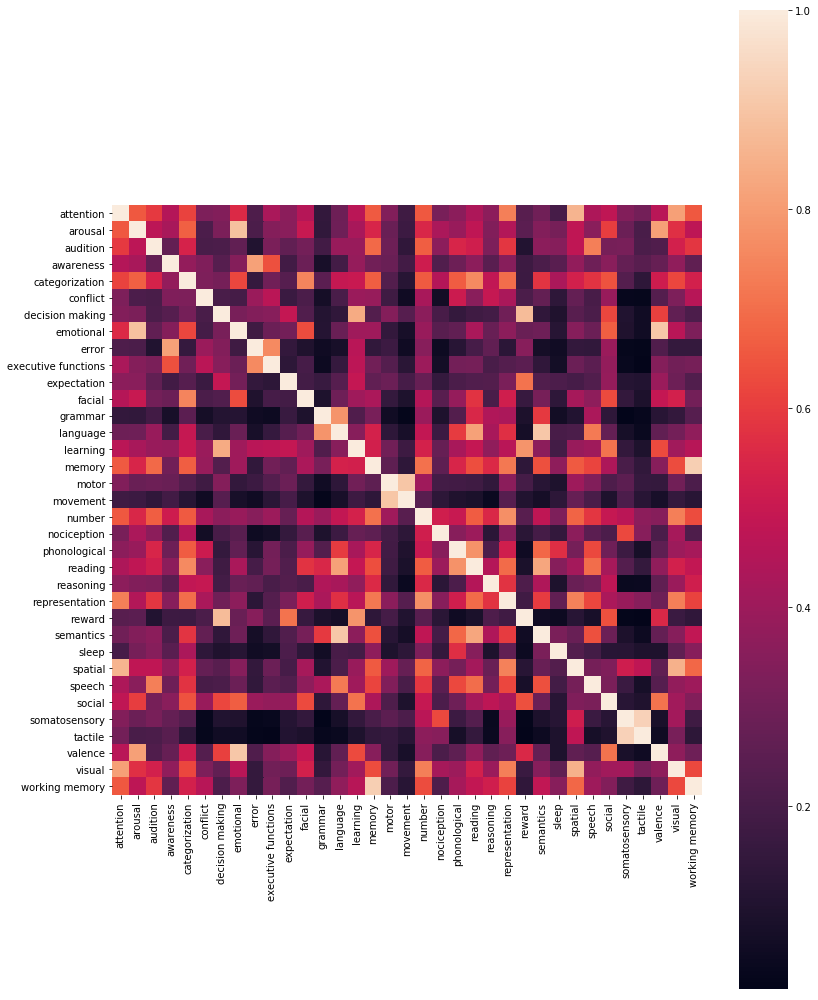

In [22]:
# Plot similarity matrix between ERPs
plot_matrix(sim_terms, counts.terms_labels, counts.terms_labels, square=True,
            figsize=(12, 14), save_fig=SAVE_FIG)

### Clustermaps

In [23]:
# Create dataframes for plotting clustermaps
dat_per_df = pd.DataFrame(counts.dat_percent, index=counts.labels, columns=counts.terms_labels)

# DF's for similarity measurements
sim_erps_df = pd.DataFrame(sim_erps, counts.labels, counts.labels)
sim_terms_df = pd.DataFrame(sim_terms, counts.terms_labels, counts.terms_labels)

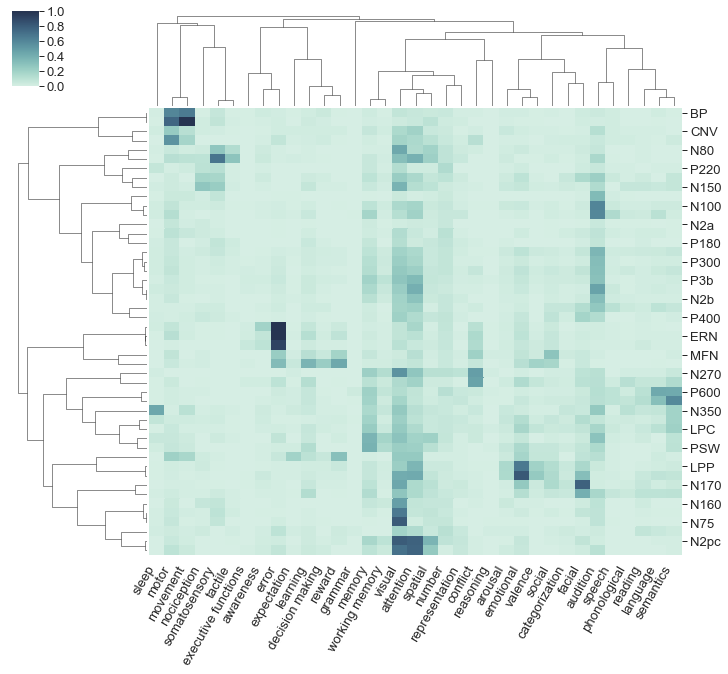

In [25]:
# Plot the clustermap - clustering ERPs & Terms based on percent overlap (cosine similarity)
plot_clustermap(dat_per_df, 'blue', save_fig=SAVE_FIG)

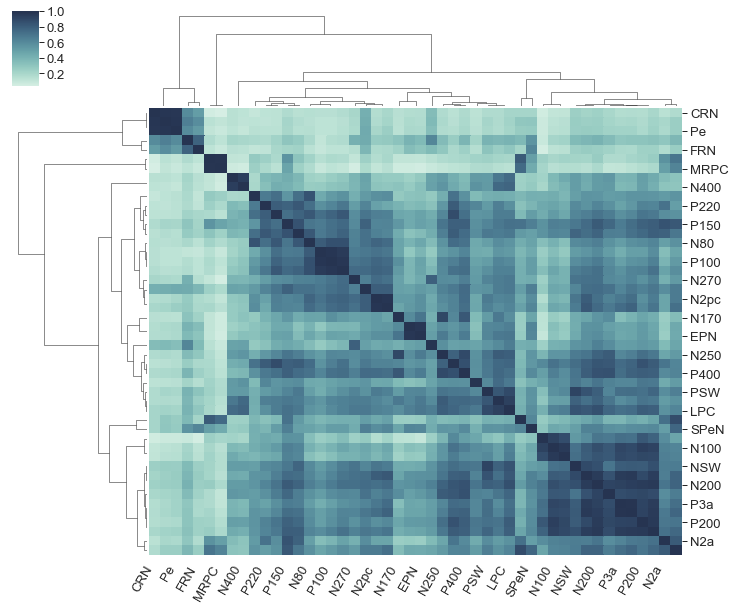

In [26]:
# Clustermap of ERP similarity
plot_clustermap(sim_erps_df, 'blue', save_fig=SAVE_FIG)

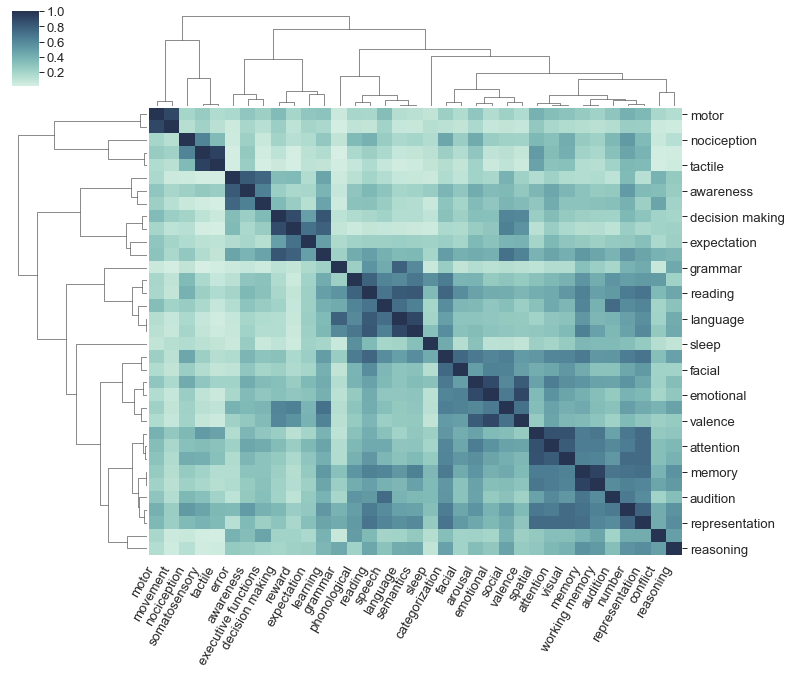

In [27]:
# Plot the clustermap of term similarity
plot_clustermap(sim_terms_df, 'blue', save_fig=SAVE_FIG)

### Dendrograms

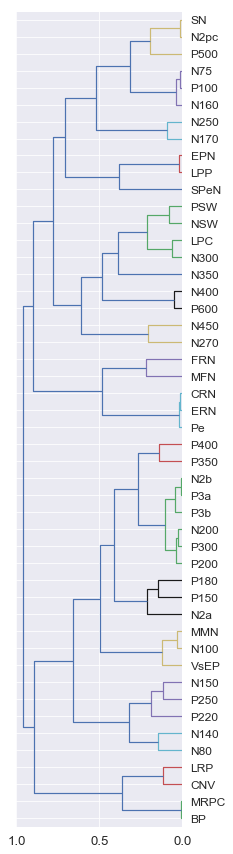

In [28]:
# Plot dendrogram of ERPs, based on percent associations with terms
plot_dendrogram(counts.dat_percent, counts.labels, save_fig=SAVE_FIG)

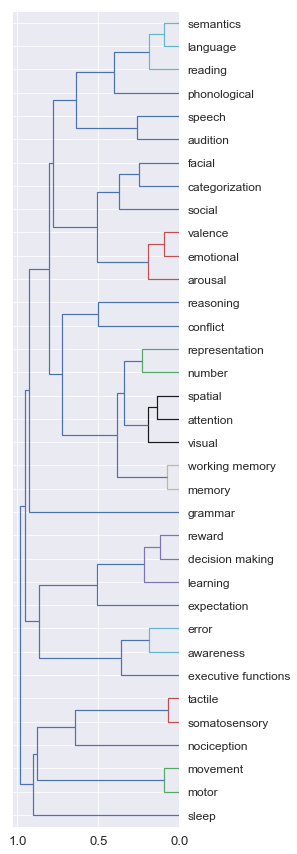

In [29]:
# Plot dendrogram of termss, based on percent associations with ERPs
plot_dendrogram(counts.dat_percent.T, counts.terms_labels, save_fig=SAVE_FIG)

### Function correlates across time

In [30]:
# Drop to most common ERPs, and check how many are left
counts.drop_data(100)
counts.n_erps

34

In [31]:
import numpy as np

def extract_time_associations():
    """Get time associations from canonically named ERP components."""
    
    time_associations = []
    
    for erp_ind, erp in enumerate(counts.labels):

        # List is: [word, P or N, latency]
        temp  = [None, None, None]

        # Get P/N & latency for ERPs with naming convention
        if erp[1:].isdigit():

            # Get P or N
            if erp[0] is 'P':
                temp[1] = 'P'
            elif erp[0] is 'N':
                temp[1] = 'N' 

            # Get latency
            temp[2] = int(erp[1:])

            # Get association
            term_ind = np.argmax(counts.dat_percent[erp_ind, :])
            temp[0] = counts.terms[term_ind][0]

            # Collect ERP data
            time_associations.append(temp)
    
    return time_associations

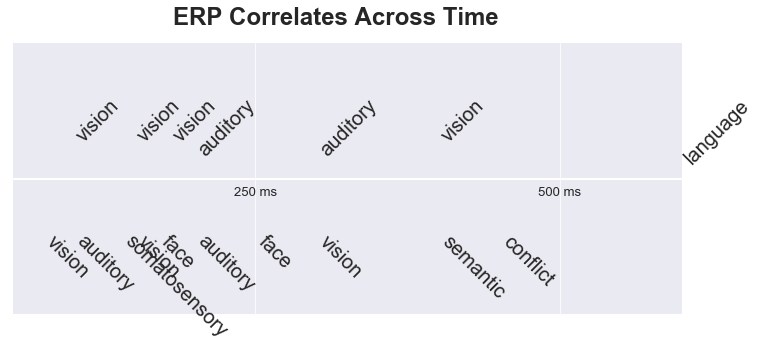

In [32]:
time_associations = extract_time_associations()
plot_time_assocs(time_associations, save_fig=SAVE_FIG)